In [ ]:
#4.Geoprocessing_Applications_of_Geopandas
#i)Reading and plotting different shape files (polygons, lines, points)
#ii) Plotting all the shape files as layers
#iii) Identifying and Converting the coordinate refernce system (crs)
#1.Polygon intersection
#2.Polygon union
#3.Symmetrical difference
#4.Differnce
#5.Dissolve a polygon
#6. Buffer Analysis
#7.Finding the centroid of the polygon
#8.Converting XY coordinates into point geometries 
#9.Performing Attribute joins
#10.Performing spatial joins using geopandas

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
#Read the study area shape file
SA1=gpd.read_file(r'F:\python\RS_GIS_Python\Applications of GeoPandas\Study_Area_1.shp')
SA1.head()

,desc,geometry
0,Study_Area_1,"POLYGON ((101.44456 4.32501, 101.44529 4.33050..."


<Axes: >

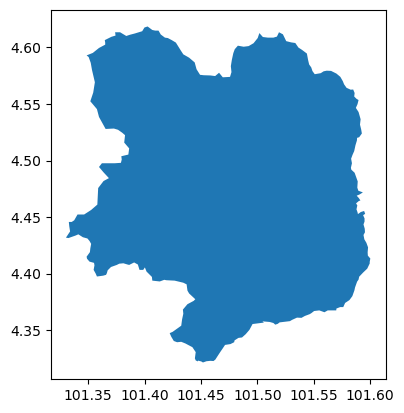

In [12]:
SA1.plot()

In [13]:
#Add second study area
SA2=gpd.read_file(r'F:\python\RS_GIS_Python\Applications of GeoPandas\Study_Area_2.shp')
SA2.head()

,desc,geometry
0,Study_Area_2,"POLYGON ((101.38479 4.40764, 101.38479 4.41038..."


<Axes: >

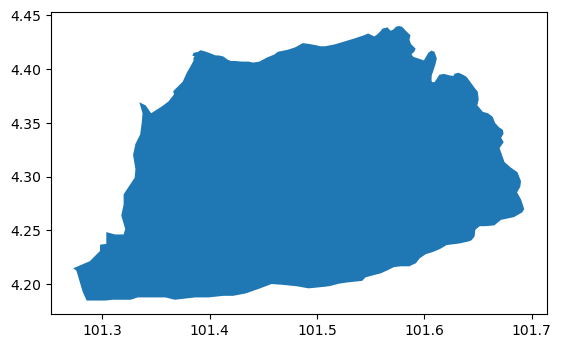

In [14]:
SA2.plot()

In [21]:
river=gpd.read_file(r'F:\python\RS_GIS_Python\Applications of GeoPandas\river.shp')
river.head()

,id,geometry
0,1,"LINESTRING (101.50991 4.56638, 101.50335 4.548..."


<Axes: >

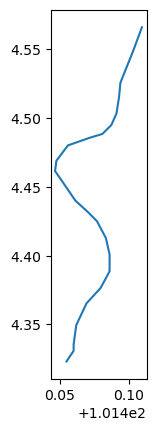

In [22]:
river.plot()

In [16]:
SA2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
SA1.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
river.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

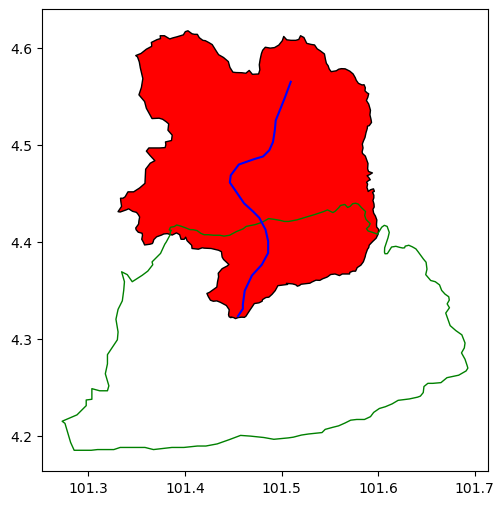

In [31]:
#Arrange all the study areas in one plot
fig, ax=plt.subplots(figsize=(6,6))
SA1.plot(ax=ax,color='red',edgecolor='black')
SA2.plot(ax=ax,color='none',edgecolor='green')
river.plot(ax=ax, color='blue')
#As we cannot see the full study area, lets change color of SA2 to 'none'

<Axes: >

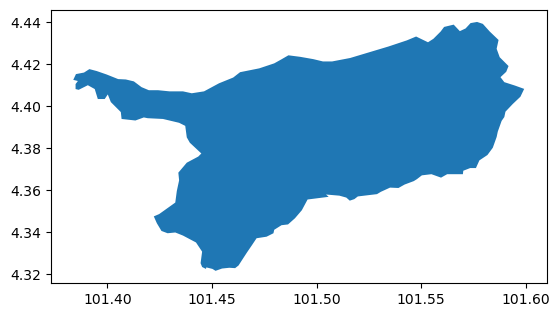

In [32]:
#1.Polygon intersection
#using SA1 and SA2 (SA is study area)
#syntax: var=gpd.overlay(studyArea1,studyArea2,how)
intersection=gpd.overlay(SA1,SA2,how='intersection')
intersection.plot()

<Axes: >

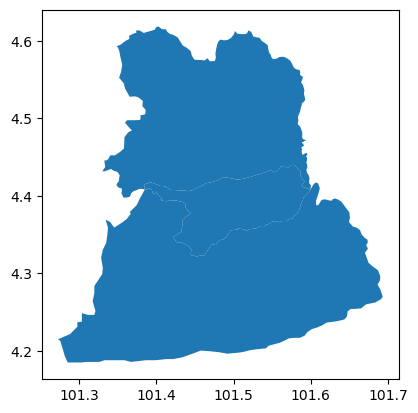

In [33]:
#2. Union of Polygon
union=gpd.overlay(SA1,SA2,how='union')
union.plot()

In [34]:
union
# row 0 is the intersection part
#row 1 SA1
#row 2 SA2

,desc_1,desc_2,geometry
0,Study_Area_1,Study_Area_2,"POLYGON ((101.44529 4.33050, 101.44236 4.33488..."
1,Study_Area_1,NaN,"POLYGON ((101.38479 4.40801, 101.38112 4.40910..."
2,NaN,Study_Area_2,"POLYGON ((101.38479 4.40801, 101.38626 4.40764..."


<Axes: >

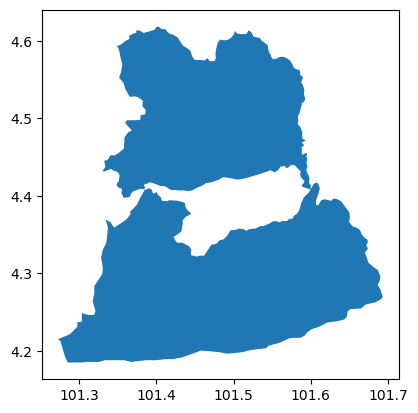

In [35]:
#3.Symmetrical differences
#It will give areas other than intersection area
sym_dif=gpd.overlay(SA1,SA2,how='symmetric_difference')
sym_dif.plot()

In [36]:
sym_dif

,desc_1,desc_2,geometry
0,Study_Area_1,NaN,"POLYGON ((101.38479 4.40801, 101.38112 4.40910..."
1,NaN,Study_Area_2,"POLYGON ((101.38479 4.40801, 101.38626 4.40764..."


<Axes: >

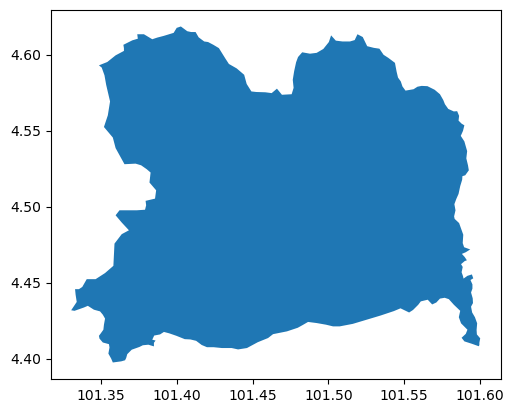

In [37]:
#4a.Difference of polygons
#SA2-SA1
#the part of SA2 is removed from SA1
dif=gpd.overlay(SA1,SA2,how='difference')
dif.plot()

<Axes: >

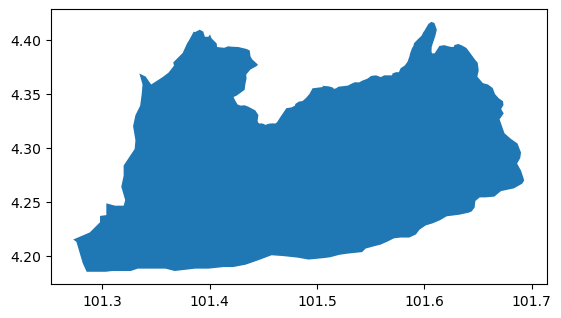

In [38]:
#4b.Difference of polygons
#SA1-SA2
#the part of SA1 is removed from SA2
dif_b=gpd.overlay(SA2,SA1,how='difference')
dif_b.plot()

<Axes: >

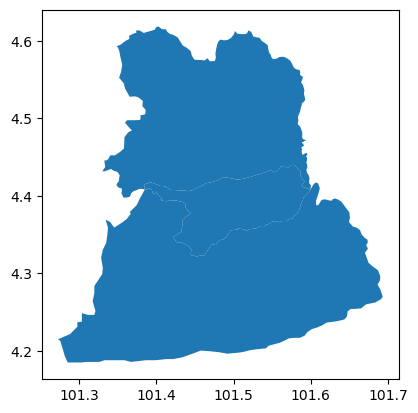

In [42]:
#5.Dissolve a polygon
#create union
union=gpd.overlay(SA1,SA2,how='union')
union.plot()
#Though union is the combination of 3 polygons, thus 3 attributes will be there.
#Using dissolve we will create a single polygon with one attribute (similar to union but with one attribute)

In [43]:
union

,desc_1,desc_2,geometry
0,Study_Area_1,Study_Area_2,"POLYGON ((101.44529 4.33050, 101.44236 4.33488..."
1,Study_Area_1,NaN,"POLYGON ((101.38479 4.40801, 101.38112 4.40910..."
2,NaN,Study_Area_2,"POLYGON ((101.38479 4.40801, 101.38626 4.40764..."


In [44]:
#To perform dissolve operation, we need a common value in the column, so create a common column
union['common_col']=1 #it can any value
union

,desc_1,desc_2,geometry,common_col
0,Study_Area_1,Study_Area_2,"POLYGON ((101.44529 4.33050, 101.44236 4.33488...",1
1,Study_Area_1,NaN,"POLYGON ((101.38479 4.40801, 101.38112 4.40910...",1
2,NaN,Study_Area_2,"POLYGON ((101.38479 4.40801, 101.38626 4.40764...",1


<Axes: >

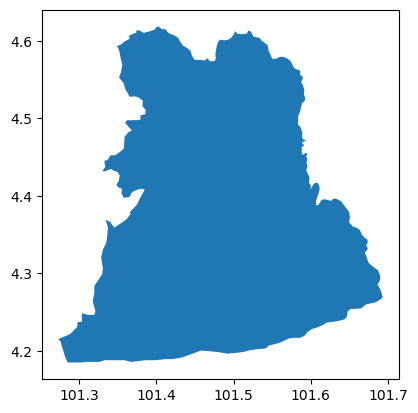

In [45]:
dissolved_SA=union.dissolve(by='common_col')
dissolved_SA.plot()

In [46]:
dissolved_SA

,geometry,desc_1,desc_2
common_col,,,
1,"POLYGON ((101.59948 4.40801, 101.60370 4.41514...",Study_Area_1,Study_Area_2


In [47]:
#6.Buffer Analysis
#creating a buffer of 500m over river
#check the coordinate river system
river.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

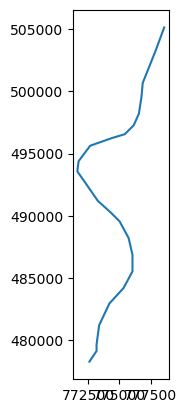

In [48]:
#As we are creating a buffer of 500m, we need to change the crs to meters, so need to change crs to projected crs 
#Reprojecting the river crs of Malaysia
river_projected=river.to_crs(epsg=24547) #crs converted to meters
river_projected.plot()

In [50]:
river_projected #in meters

,id,geometry
0,1,"LINESTRING (778620.752 505214.942, 777899.429 ..."


In [52]:
type(river_projected)

geopandas.geodataframe.GeoDataFrame

In [53]:
type(river_projected['geometry'])

geopandas.geoseries.GeoSeries

<Axes: >

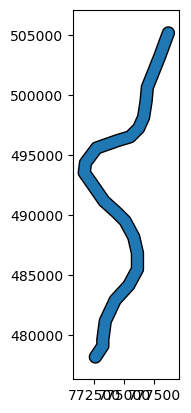

In [55]:
#We can perform buffere analysis on GeoSeries
#river_projected is a geodataframe
#Each numerical column (geometry) is a Geoseries
buffer_500m=river_projected['geometry'].buffer(distance=500)
buffer_500m.plot(edgecolor='black')

C:\Users\suchi\AppData\Local\Temp\ipykernel_2396\1845778397.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid=union['geometry'].centroid


<Axes: >

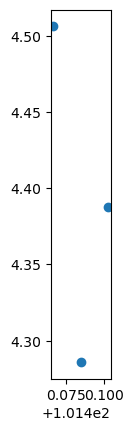

In [56]:
#7. Find the centriod of the polygon
#create union
centroid=union['geometry'].centroid
centroid.plot()

<Axes: >

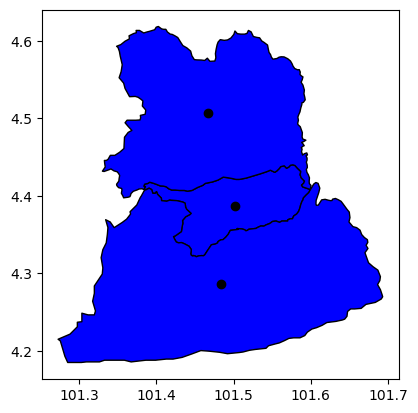

In [60]:
fig,ax=plt.subplots()
union.plot(ax=ax, color='blue',edgecolor='black')
centroid.plot(ax=ax, color='black')


<Axes: >

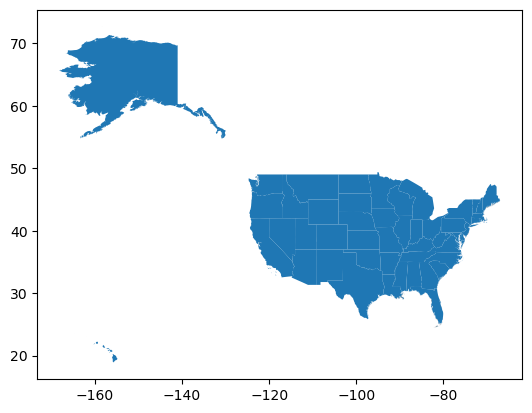

In [2]:
#8.Converting XY coordinates into point geometries 
Using csv file from kaggle
#Different airports in US (Attributes:IATA, AIRPORT, CITY, STATE, COUNTRY, LATITUDE, LONGITUDE)
us_states=gpd.read_file(r'F:\python\RS_GIS_Python\Applications of GeoPandas\us_states.shp')
us_states.plot()

In [80]:
us_states.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
us_states.head()

,NAME_1,geometry
0,Alabama,"MULTIPOLYGON (((-88.11320 30.22623, -88.11291 ..."
1,Alaska,"MULTIPOLYGON (((-141.31459 60.05416, -141.3125..."
2,Arizona,"POLYGON ((-110.53930 37.00423, -110.47991 37.0..."
3,Arkansas,"POLYGON ((-93.36903 36.49686, -93.36530 36.496..."
4,California,"MULTIPOLYGON (((-117.23285 32.77641, -117.2330..."


In [3]:
df=pd.read_csv(r'F:\python\RS_GIS_Python\Applications of GeoPandas\us_airports.csv')
df.head()

,IATA,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.174320,-149.996186
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944
3,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872
4,BDL,Bradley International,Windsor Locks,CT,USA,41.938874,-72.683228


In [65]:
df.shape

(340, 7)

In [66]:
df.isnull().sum()

IATA         0
AIRPORT      0
CITY         3
STATE        3
COUNTRY      0
LATITUDE     0
LONGITUDE    0
dtype: int64

In [67]:
df.columns

Index(['IATA', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE', 'LONGITUDE'], dtype='object')

In [4]:
#Create a geometry column in df
df['geometry']=gpd.points_from_xy(df['LONGITUDE'],df['LATITUDE'])
gdf=gpd.GeoDataFrame(df,crs='EPSG:4326')
gdf.head()
#Another way to create geodataframe with geometry column
#gdf=gpd.GeoDataFrame(df,crs='EPSG:4326',geometry=gpd.points_from_xy(df['LONGITUDE'],df['LATITUDE']))

,IATA,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,geometry
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194,POINT (-106.60919 35.04022)
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.174320,-149.996186,POINT (-149.99619 61.17432)
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,POINT (-84.42694 33.64044)
3,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872,POINT (-97.66987 30.19453)
4,BDL,Bradley International,Windsor Locks,CT,USA,41.938874,-72.683228,POINT (-72.68323 41.93887)


In [68]:
#Create a geometry column in df
df['geometry']=gpd.points_from_xy(df['LONGITUDE'],df['LATITUDE'])

In [69]:
df.head()

,IATA,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,geometry
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194,POINT (-106.60919 35.04022)
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.174320,-149.996186,POINT (-149.99619 61.17432)
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,POINT (-84.42694 33.64044)
3,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872,POINT (-97.66987 30.19453)
4,BDL,Bradley International,Windsor Locks,CT,USA,41.938874,-72.683228,POINT (-72.68323 41.93887)


In [84]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
#Way2 to add geometry to df
from shapely.geometry import Point
geometry_new=[Point(xy) for xy in zip(df['LONGITUDE'],df['LATITUDE'])]

In [72]:
type(geometry_new)

list

In [75]:
#geometry_new

In [6]:
df_new=gpd.GeoDataFrame(df,geometry=geometry_new,crs='EPSG:4326')
df_new.head()

,IATA,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,geometry
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194,POINT (-106.60919 35.04022)
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.174320,-149.996186,POINT (-149.99619 61.17432)
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,POINT (-84.42694 33.64044)
3,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872,POINT (-97.66987 30.19453)
4,BDL,Bradley International,Windsor Locks,CT,USA,41.938874,-72.683228,POINT (-72.68323 41.93887)


In [86]:
df_new.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

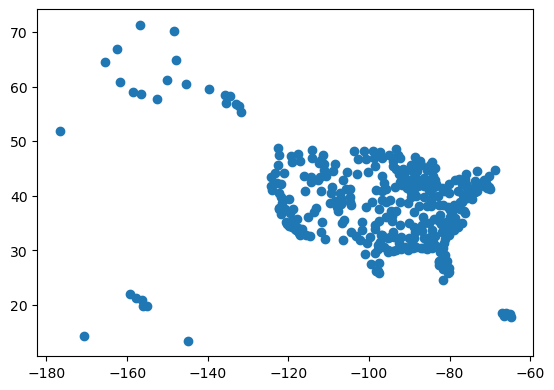

In [7]:
df_new.plot()

<Axes: >

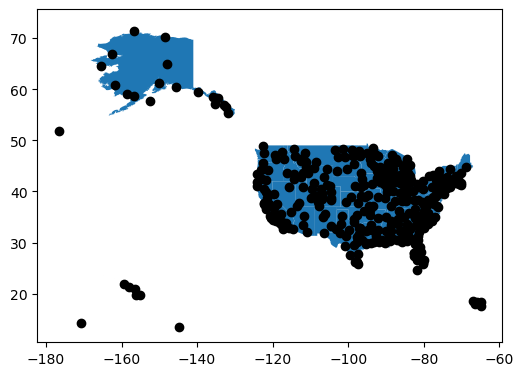

In [8]:
fig,ax=plt.subplots(figsize=(6,6))
us_states.plot(ax=ax)
df_new.plot(ax=ax, color='black')

In [9]:
#9. Performing Attribute Joins
df_new.head()

,IATA,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,geometry
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194,POINT (-106.60919 35.04022)
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.174320,-149.996186,POINT (-149.99619 61.17432)
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,POINT (-84.42694 33.64044)
3,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872,POINT (-97.66987 30.19453)
4,BDL,Bradley International,Windsor Locks,CT,USA,41.938874,-72.683228,POINT (-72.68323 41.93887)


In [11]:
states=pd.read_csv(r'F:\python\RS_GIS_Python\Applications of GeoPandas\state names and codes.csv')
states.head()

,state_name,state_code
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [12]:
#Since both df_new and states dataset has state column with different column names.
#Change the column name STATES in df_new to state_code
df_new.rename(columns={'STATE':'state_code'},inplace=True)
df_new.head()
#Now we have a common column in both datasets

,IATA,AIRPORT,CITY,state_code,COUNTRY,LATITUDE,LONGITUDE,geometry
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194,POINT (-106.60919 35.04022)
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.174320,-149.996186,POINT (-149.99619 61.17432)
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,POINT (-84.42694 33.64044)
3,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872,POINT (-97.66987 30.19453)
4,BDL,Bradley International,Windsor Locks,CT,USA,41.938874,-72.683228,POINT (-72.68323 41.93887)


In [13]:
#Attribute join: Here we joining states df sttributes to df_new data
dfnew_states=df_new.merge(states, on='state_code')
dfnew_states.head()

,IATA,AIRPORT,CITY,state_code,COUNTRY,LATITUDE,LONGITUDE,geometry,state_name
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194,POINT (-106.60919 35.04022),New Mexico
1,HOB,Lea County Regional,Hobbs,NM,USA,32.687528,-103.217028,POINT (-103.21703 32.68753),New Mexico
2,ROW,Roswell Industrial Air Center,Roswell,NM,USA,33.301556,-104.530556,POINT (-104.53056 33.30156),New Mexico
3,SAF,Santa Fe Municipal,Santa Fe,NM,USA,35.616778,-106.088139,POINT (-106.08814 35.61678),New Mexico
4,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872,POINT (-97.66987 30.19453),Texas


In [16]:
#10. Performing spatial joins using geopandas
#using us_states.shp;df_new==> airports data
us_states.head()

,NAME_1,geometry
0,Alabama,"MULTIPOLYGON (((-88.11320 30.22623, -88.11291 ..."
1,Alaska,"MULTIPOLYGON (((-141.31459 60.05416, -141.3125..."
2,Arizona,"POLYGON ((-110.53930 37.00423, -110.47991 37.0..."
3,Arkansas,"POLYGON ((-93.36903 36.49686, -93.36530 36.496..."
4,California,"MULTIPOLYGON (((-117.23285 32.77641, -117.2330..."


In [17]:
states.head()

,state_name,state_code
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [37]:
airports_us=df_new[['AIRPORT','geometry']]
airports_us.head()

,AIRPORT,geometry
0,Albuquerque International,POINT (-106.60919 35.04022)
1,Ted Stevens Anchorage International,POINT (-149.99619 61.17432)
2,William B Hartsfield-Atlanta Intl,POINT (-84.42694 33.64044)
3,Austin-Bergstrom International,POINT (-97.66987 30.19453)
4,Bradley International,POINT (-72.68323 41.93887)


<Axes: >

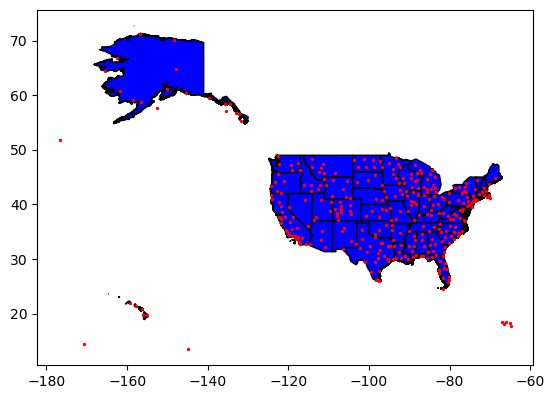

In [23]:
fig,ax=plt.subplots()
us_states.plot(ax=ax,color='blue',edgecolor='black')
airports_us.plot(ax=ax,markersize=2,color='red')

In [35]:
airports_us.columns

Index(['AIRPORT', 'geometry'], dtype='object')

In [38]:
#Here we will identify the state to which the airport belongs to??
#airports_us_states=gpd.sjoin(airports_us, us_states, how='inner', predicate='intersects',lsuffix='left')
airports_us_states=gpd.sjoin(airports_us, us_states, how='inner', predicate='intersects')
#airports_us_st=gpd.sjoin(airports_us, us_states)
#left means airports_us
#right means us_states
#inner means intersection
airports_us_states.head()

,AIRPORT,geometry,index_right,NAME_1
0,Albuquerque International,POINT (-106.60919 35.04022),31,New Mexico
196,Lea County Regional,POINT (-103.21703 32.68753),31,New Mexico
295,Roswell Industrial Air Center,POINT (-104.53056 33.30156),31,New Mexico
297,Santa Fe Municipal,POINT (-106.08814 35.61678),31,New Mexico
1,Ted Stevens Anchorage International,POINT (-149.99619 61.17432),1,Alaska
